# Models : 2D parameters

The aim of this notebook is to indicate how to read the 2D data from models.
There are 2 models:
<ul>
    <li>a fine-mesh french model called 'AROME' (spatial resolution of 0.025°)</li>
    <li>a large-mesh french model called 'ARPEGE' (spatial resolution of 0.1°)</li>
</ul>

Per model, geographic zone ('NW' for North-West of France and 'SE' for South-East of France) and day, you have the model run of 00h with range forecasts from 00h to 24h. The time step can be different according to models:
<ul>
    <li>about AROME, the time step is 1h.</li>
    <li>about ARPEGE the time step is 1h from 0h to 12h and can sometimes rise to 3h after 12h (from 12h to 24h of range forecasts) </li>
</ul>

Finally, the 2D data are stored in 4 different GRIB files, according to the vertical level:
<ul>
    <li>at 2m ('2m' in the file name) : temperature (in K), dew point temperature (in K) and relative humidity (in %)</li>
    <li>at 10m ('10m' in the file name): wind speed (in m.s<sup>-1</sup>), wind direction (in degrees), U and V wind components (in m.s<sup>-1</sup>)</li>
    <li>at the sea level ('P_sea_level' in the file name) : mean sea level pressure (in Pa) </li>
    <li>at the ground level ('PRECIP' in the file name)  : total precipitation (in kg m<sup>-2</sup>) </li>
</ul>

/!\ : about the total precipitation parameter, the range forecast begins to 1h and not 0h as the other parameters.

Remark 1: to open easily a GRIB file with Python, it is necessary to install the packages (in this order) *eccodes*, *cfgrib* then *xarray* with the following commands (if you use the Anaconda environment):
<ul>
    <li>1:conda install -c conda-forge eccodes</li>
    <li>2:conda install -c conda-forge cfgrib</li>
    <li>3:conda install -c anaconda xarray</li>    
</ul>

When you open a GRIB file with the library xarray, a new associated file of type .idx is created. 

Remark 2: the *Basemap* library is required to plot the background map. Here is the command to type into in a terminal to install the package if you use the Anaconda environment : *conda install -c anaconda basemap*</li>

In [1]:
#####TO DO ONLY IF YOU ARE A PROBLEM WITH THE LIBRARY BASEMAP OR XARRAY###
import os
#####TO DO ONLY IF YOU ARE A PROBLEM TO IMPORT THE BASEMAP LIBRARY -> PROBLEM OF TYPE "KeyError : 'PROJ_LIB'" (cf next cell)#####
#indicate the path to the file 'epsg'
#(located normally into the directory /Library/share of Anaconda) via the next commands : 
os.environ["PROJ_LIB"]="C:/Users/larvorg/AppData/Local/Continuum/anaconda3/Library/share"   #-> type example of path

#####TO DO ONLY IF YOU ARE A PROBLEM TO IMPORT THE ECCODES LIBRARY -> PROBLEM OF TYPE "ECCODES ERROR   :  Unable to find boot.def,
#The environment variable ECCODES_DEFINITION_PATH is defined but incorrect"
#Solution : indicate the path to the file 'boot.def'
#(located normally into the directory Library/share/eccodes/definitions of Anaconda)
os.environ["ECCODES_DEFINITION_PATH"]="C:/Users/larvorg/AppData/Local/Continuum/anaconda3/Library/share/eccodes/definitions"   #-> type example of path

In [2]:
from data_exploration.utils.user_configuration import *
import xarray as xr
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm 


In [3]:
####Cell containing the modifiable fields######
model = 'AROME'      #model (AROME or ARPEGE)
zone = 'NW'               #geographic zone (NW or SE)
level = '2m'              #vertical level (2m, 10m, P_sea_level or PRECIP)
date = '20180529000000'   #run date (at format YYYYMMDDHHMMSS) 
param = 't2m'           #parameter name in the file (cf cell below to know the parameter names -> overview of data)
step = 0                #index for the studied time step (cf plot example below)

In [5]:
year = date[0:4]
month = date[4:6]
day =  date[6:8]
if model =='AROME':
    model2 = 'arome'
else:
    model2 = 'arpege'
data_path = path +'models/'+date[0:6]+'/'+model+'/'+zone+'/'+year+'/'+month+'/'+day+'/'   #path to the data
file = model2+'_'+level+'_'+zone+'_'+date+'.grib'      #file name 

#coordinates of study zone boundaries
lllat=DOMAINS[zone]['lry']    #lower left latitude
urlat=DOMAINS[zone]['uly']    #upper right latitude
lllon=DOMAINS[zone]['ulx']    #lower left longitude
urlon=DOMAINS[zone]['lrx']    #upper right longitude

data = xr.open_dataset(data_path+file, engine='cfgrib')   #data loading

Ignoring index file 'D:\\Data\\open_data\\samples\\models\\201805\\AROME\\NW\\2018\\05\\29\\arome_2m_NW_20180529000000.grib.011ab.idx' incompatible with GRIB file


Overview of the data -> print(data) to get the metadata : 

In [6]:
print(data)

<xarray.Dataset>
Dimensions:            (latitude: 227, longitude: 315, step: 25)
Coordinates:
    time               datetime64[ns] ...
  * step               (step) timedelta64[ns] 00:00:00 ... 1 days 00:00:00
    heightAboveGround  int32 ...
  * latitude           (latitude) float64 51.9 51.87 51.85 ... 46.3 46.27 46.25
  * longitude          (longitude) float64 -5.842 -5.817 -5.792 ... 1.983 2.008
    valid_time         (step) datetime64[ns] ...
Data variables:
    t2m                (step, latitude, longitude) float32 ...
    d2m                (step, latitude, longitude) float32 ...
    r                  (step, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2019-10-14T14:05:01 GRIB to CDM+CF via cfg

Get the information about coordinates (latitude and longitude):

In [7]:
coord = 'longitude'
data[coord]
vals = data[coord].values  #get the values
print(data[coord])

<xarray.DataArray 'longitude' (longitude: 315)>
array([-5.842, -5.817, -5.792, ...,  1.958,  1.983,  2.008])
Coordinates:
    time               datetime64[ns] ...
    heightAboveGround  int32 ...
  * longitude          (longitude) float64 -5.842 -5.817 -5.792 ... 1.983 2.008
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude


In [8]:
print(data[coord].units)  #example to get the information from attributes

degrees_east


Get the information about the run date and the different range forecasts:

In [9]:
run_date = data['time']
#run_date.values     #get the values
run_date

<xarray.DataArray 'time' ()>
array('2018-05-29T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time               datetime64[ns] 2018-05-29
    heightAboveGround  int32 ...
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

In [10]:
range_forecasts_dates = data['valid_time']
range_forecasts_dates

<xarray.DataArray 'valid_time' (step: 25)>
array(['2018-05-29T00:00:00.000000000', '2018-05-29T01:00:00.000000000',
       '2018-05-29T02:00:00.000000000', '2018-05-29T03:00:00.000000000',
       '2018-05-29T04:00:00.000000000', '2018-05-29T05:00:00.000000000',
       '2018-05-29T06:00:00.000000000', '2018-05-29T07:00:00.000000000',
       '2018-05-29T08:00:00.000000000', '2018-05-29T09:00:00.000000000',
       '2018-05-29T10:00:00.000000000', '2018-05-29T11:00:00.000000000',
       '2018-05-29T12:00:00.000000000', '2018-05-29T13:00:00.000000000',
       '2018-05-29T14:00:00.000000000', '2018-05-29T15:00:00.000000000',
       '2018-05-29T16:00:00.000000000', '2018-05-29T17:00:00.000000000',
       '2018-05-29T18:00:00.000000000', '2018-05-29T19:00:00.000000000',
       '2018-05-29T20:00:00.000000000', '2018-05-29T21:00:00.000000000',
       '2018-05-29T22:00:00.000000000', '2018-05-29T23:00:00.000000000',
       '2018-05-30T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
   

Get the information about the vertical level:

In [11]:
if (level =='2m' or level == '10m'):
    level_name = 'heightAboveGround'
elif (level =='P_sea_level'):
    level_name = 'meanSea'
else:
    level_name = 'surface'
info_level = data[level_name]
info_level

<xarray.DataArray 'heightAboveGround' ()>
array(2)
Coordinates:
    time               datetime64[ns] 2018-05-29
    heightAboveGround  int32 2
Attributes:
    long_name:      height above the surface
    units:          m
    positive:       up
    standard_name:  height

Get the information about one parameter: 
the parameter names in the GRIB file are indicated in the field 'Data variables' (cf print(data) above)

In [12]:
d = data[param]     #param : parameter name defined at the beginning of the Notebook 
d_vals=d.values     #get the values
###examples to get the information from attributes
#d.units                      #unit
#d.long_name                      #long name
d

<xarray.DataArray 't2m' (step: 25, latitude: 227, longitude: 315)>
array([[[285.46487, 285.45145, ..., 285.49942, 285.579  ],
        [285.50647, 285.49078, ..., 285.55148, 285.64108],
        ...,
        [288.4057 , 288.4671 , ..., 286.78705, 286.2136 ],
        [288.34296, 288.3664 , ..., 286.34845, 286.00806]],

       [[285.54514, 285.5308 , ..., 285.8207 , 285.89233],
        [285.5856 , 285.5674 , ..., 285.88028, 285.95508],
        ...,
        [288.50485, 288.50098, ..., 286.1006 , 285.5242 ],
        [288.5028 , 288.50986, ..., 285.68497, 285.29343]],

       ...,

       [[286.01324, 286.04037, ..., 284.28534, 284.2781 ],
        [286.07364, 286.11115, ..., 284.3348 , 284.32556],
        ...,
        [287.96582, 287.97263, ..., 286.54517, 286.4346 ],
        [287.99396, 288.02664, ..., 286.0556 , 286.1036 ]],

       [[285.95844, 285.98358, ..., 284.4842 , 284.4488 ],
        [286.03174, 286.062  , ..., 284.49783, 284.4566 ],
        ...,
        [288.15472, 288.15372, ..., 

The structure of the parameter (3 dimensions):
<ul>
    <li>number of steps or range forecasts</li>
    <li>number of points in latitude</li>
    <li>number of points in longitude</li>   
</ul>

In [13]:
d_vals.shape

(25, 227, 315)

Plot the parameter values for 1 given time step:

<IPython.core.display.Javascript object>


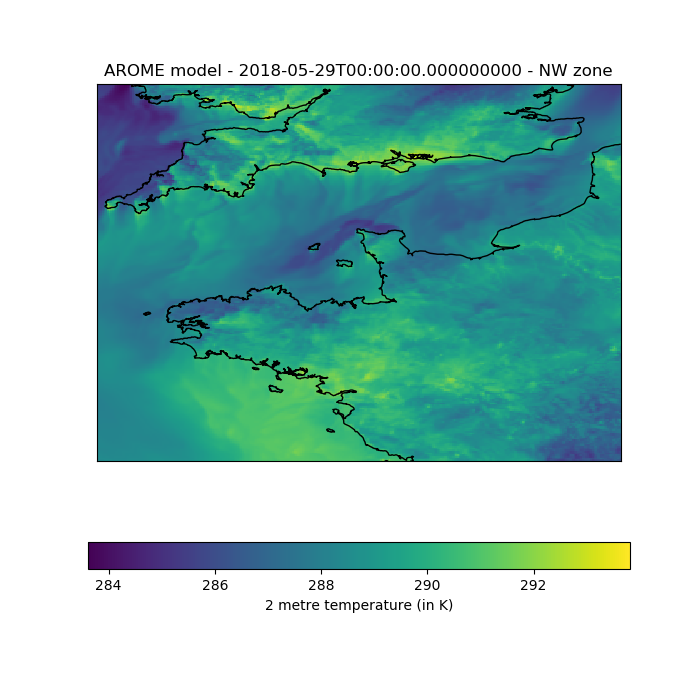

C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


In [14]:
fig,ax=plt.subplots(1,1,figsize=(7,7))

#background map definition : coordinates of corners, resolution, projection type
m = Basemap(epsg=n_epsg,resolution='h',llcrnrlat=lllat,
                  urcrnrlat=urlat,
                  llcrnrlon=lllon,
                  urcrnrlon=urlon)

#plot the data and the background map (coastlines and borders)
m.drawcoastlines()
m.drawcountries()
img=m.imshow(d_vals[step,:,:], interpolation='none', origin='upper')
plt.colorbar(img, orientation= 'horizontal').set_label(d.long_name+ ' (in '+d.units+ ')')
plt.title(model +" model - "+str(d['valid_time'].values[step])+" - " +zone + " zone")
plt.show()